## Allen helper example

In [1]:
import sys
sys.path.append('..')

from allen_functions import AllenHelper
from matplotlib import pyplot as plt

In [2]:
helper = AllenHelper(atlas_id=3, downsample=3)

In [3]:
len(helper.get_section_numbers())

169

In [4]:
im_arr = helper.get_sectionimage(357)

In [5]:
im_arr.shape

(4756, 2452, 3)

In [6]:
helper.get_viewer_url(357)

'https://atlas.brain-map.org/atlas?atlas=3&plate=101892528&zoom=-5'

In [7]:
annot357 = helper.get_annotation(357)

## Allen ontology helper

In [11]:
from ontology_handling import TreeHelper
ontohelper_allen = TreeHelper('allen_devhuman')

In [12]:
len(ontohelper_allen)

3315

In [13]:
ontohelper_allen.print_tree()

[lvl] id (acronym) name
---------------------
 [0] 10155 (Br) brain
   [1] 10156 (F) forebrain (prosencephalon)
     [2] 10157 (FGM) gray matter of forebrain
       [3] 10506 (FTS) transient structures of forebrain
         [4] 11580 (SG) subpial granular zone
           [5] 11581 (fSG) SG in frontal neocortex
             [6] 11587 (fSGfp) SG in frontal polar cortex
             [6] 11582 (fSGdm) SG in dorsomedial frontal cortex
             [6] 11585 (fSGdl) SG in dorsolateral prefrontal cortex
             [6] 11586 (fSGvl) SG in ventrolateral prefrontal cortex
             [6] 11583 (fSGor) SG in orbital frontal cortex
             [6] 11584 (fSGm1) SG in posterior frontal cortex (motor cortex)
           [5] 11593 (pSG) SG in parietal neocortex
             [6] 11594 (pSGs1) SG in primary somatosensory cortex
             [6] 11597 (pSGdm) SG in dorsomedial parietal cortex (area 7m)
             [6] 11595 (pSGpd) SG in posterosuperior (dorsal) parietal cortex
             [6] 1159

### display annotations

In [15]:
from nb_functions import display_annotation

a filter for ``selectedlev`` is provided in the display function. The available regions are printed in a tab-indented list with color legend

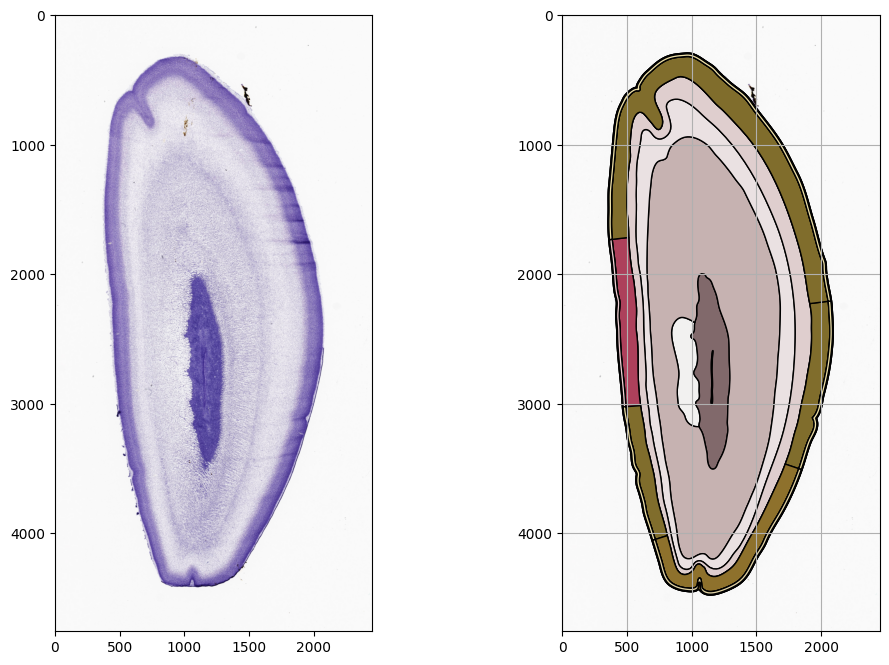

In [19]:
display_annotation(im_arr,annot357, ontohelper_allen)

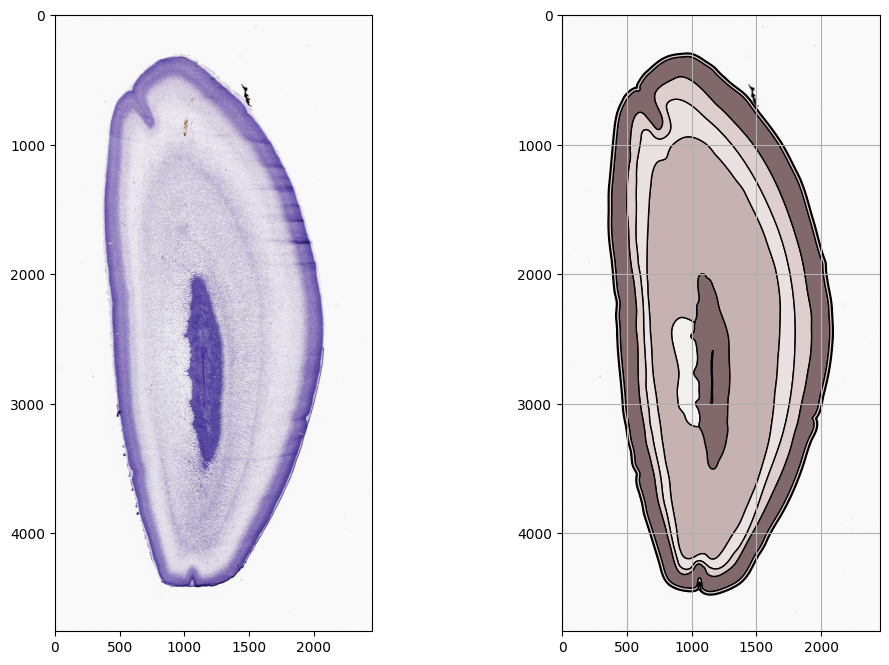

In [22]:
display_annotation(im_arr,annot357, ontohelper_allen, selectedlev=4)

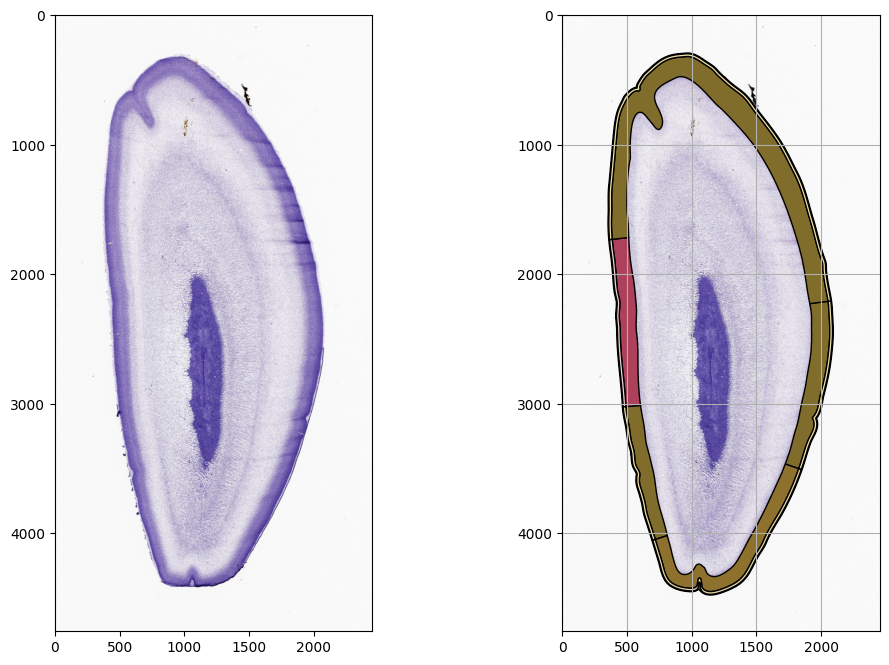

In [24]:
display_annotation(im_arr, annot357, ontohelper_allen, selectedlev=6)

## find superstructures

In [25]:
from annotation_handling import find_superids

superids = find_superids(annot357,ontohelper_allen)

In [26]:
superids

defaultdict(list,
            {10155: [10595,
              10596,
              10557,
              10561,
              11580,
              12967,
              11587,
              11586,
              11585,
              11583,
              10542,
              10536,
              10529,
              10522,
              10515,
              11716,
              11664,
              11661,
              11658,
              11652,
              10508,
              11630,
              11612,
              11611,
              11610,
              11608],
             10595: [10596],
             10557: [10561],
             11580: [12967, 11587, 11586, 11585, 11583],
             10515: [11716, 11664, 11661, 11658, 11652],
             10508: [11630, 11612, 11611, 11610, 11608]})

In [30]:
annot357[10596]==annot357[10595]

True

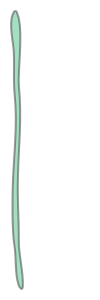

In [31]:
annot357[10596]

In [35]:
ontohelper_allen.onto_lookup[10596]

NodeRecord(acronym='LV', name='lateral ventricles', level=3, parentid=10595, color_hex_triplet='#231F20')

## Searchable tree display (jstree)

Shows the Allen ontology as an embedded jstree (https://www.jstree.com/) with a search box

In [32]:
from nb_functions import show_jstree

Note: if the below cell does not show two elements (brain, spinal cord), restart the notebook and retry

In [33]:
show_jstree(allen_onto_helper)

In [46]:
allen_onto_helper.search('gray matter of forebrain')

[('gray matter of forebrain', 100.0, 10157)]

In [22]:
allen_onto_helper.onto_lookup[10294]

NodeRecord(acronym='HIP', name='hippocampus (hippocampal formation)', level=7, parentid=10293, color_hex_triplet='#BFB5D5')

In [25]:
allen_onto_helper.onto_lookup[10331]

NodeRecord(acronym='CN', name='cerebral nuclei', level=4, parentid=10158, color_hex_triplet='#D7E9C3')

In [27]:
allen_onto_helper.onto_lookup[10506]

NodeRecord(acronym='FTS', name='transient structures of forebrain', level=3, parentid=10157, color_hex_triplet='#E3D6D7')

In [29]:
allen_onto_helper.onto_lookup[10467]

NodeRecord(acronym='HTH', name='hypothalamus', level=4, parentid=10389, color_hex_triplet='#E4C9D9')

In [31]:
allen_onto_helper.onto_lookup[10390]

NodeRecord(acronym='THM', name='thalamus', level=4, parentid=10389, color_hex_triplet='#E4CCE3')

In [34]:
allen_onto_helper.onto_lookup[10648]

NodeRecord(acronym='M', name='midbrain (mesencephalon)', level=1, parentid=10155, color_hex_triplet='#AFD0DD')

In [36]:
allen_onto_helper.onto_lookup[10653]

NodeRecord(acronym='H', name='hindbrain (rhombencephalon)', level=1, parentid=10155, color_hex_triplet='#CAD7EE')

In [38]:
allen_onto_helper.onto_lookup[10656]

NodeRecord(acronym='CB', name='cerebellum', level=4, parentid=10655, color_hex_triplet='#9EBAE1')

In [43]:
allen_onto_helper.onto_lookup[10557]

NodeRecord(acronym='FWM', name='white matter of forebrain', level=2, parentid=10156, color_hex_triplet='#F2F1F0')

In [45]:
allen_onto_helper.onto_lookup[10595]

NodeRecord(acronym='FV', name='ventricles of forebrain', level=2, parentid=10156, color_hex_triplet='#231F20')

In [47]:
allen_onto_helper.onto_lookup[10157]

NodeRecord(acronym='FGM', name='gray matter of forebrain', level=2, parentid=10156, color_hex_triplet='#EBD6D0')

## Low level calls 

These are abstracted by the AllenHelper;
Shown here for demonstration purpose.

Uses Allen API (https://community.brain-map.org/t/atlas-drawing-and-ontologies/2864)
to fetch Allen Developing human brain atlas

In [20]:
import requests
import sys
sys.path.append('..')

from allen_functions import (
    fetch_atlas_metadata, fetch_graphic_groups, fetch_atlas_images, 
    get_image_url, get_svg_url
)

from PIL import Image
import numpy as np
from io import BytesIO
import json

from matplotlib import pyplot as plt

atlas ids:
* 3 = 21 pcw cerebrum
* 287730656 = 21 pcw brainstem
* 138322603 = 15 pcw

In [21]:
atlas_id=3

metadata = fetch_atlas_metadata( atlas_id )
images = fetch_atlas_images( metadata )
graphic_groups = fetch_graphic_groups( metadata )

In [22]:
'number of images: %d' % len(images)

'number of images: 169'

In [23]:
# mpp = 2^downsample
downsample = 3  # implies mpp=8

In [24]:
for img in images:
    if img['section_number']==357:
        break

In [25]:
img

{'annotated': True,
 'axes': None,
 'bits_per_component': 8,
 'data_set_id': 100134982,
 'expression': False,
 'expression_path': None,
 'failed': False,
 'height': 38048,
 'id': 101892528,
 'image_height': 38064,
 'image_type': 'Primary',
 'image_width': 19632,
 'isi_experiment_id': None,
 'lims1_id': 101892528,
 'number_of_components': 3,
 'ophys_experiment_id': None,
 'path': '/external/devhuman/prod13/0536130347/0536130347.aff',
 'projection_function': None,
 'resolution': 0.9866,
 'section_number': 357,
 'specimen_id': None,
 'structure_id': None,
 'tier_count': 9,
 'width': 19616,
 'x': 0,
 'y': 0,
 'atlas_data_set': {'blue_channel': None,
  'delegate': False,
  'expression': False,
  'failed': False,
  'failed_facet': 734881840,
  'green_channel': None,
  'id': 100134982,
  'name': None,
  'plane_of_section_id': 1,
  'qc_date': '2011-05-19T18:16:14Z',
  'red_channel': None,
  'reference_space_id': None,
  'rnaseq_design_id': None,
  'section_thickness': 20.0,
  'specimen_id': 70

In [26]:
# img = images[20]
image_url = get_image_url(atlas_id, img, downsample, False)
annot_url = get_svg_url(atlas_id, img, graphic_groups[-1:], downsample)

In [27]:
req = requests.get(image_url, timeout=500, stream=True)
im = Image.open(BytesIO(req.content))

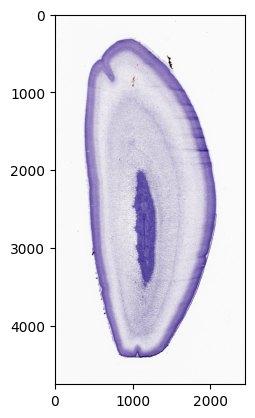

In [28]:
plt.imshow(im)

In [29]:
annot_url

'http://api.brain-map.org/api/v2/svg/101892528?downsample=3&groups=31'

In [30]:
req = requests.get(annot_url, timeout=500)

In [32]:
from allen_functions import get_svg_paths_as_shapes

In [33]:
svg_data = req.text

In [49]:
annot357_shapes_unscaled = get_svg_paths_as_shapes(svg_data)
annot357_shapes = get_svg_paths_as_shapes(svg_data,scale=3/2**downsample)

In [50]:
annot357_shapes_unscaled.keys()

dict_keys([10155, 10595, 10596, 10557, 10561, 11580, 12967, 11587, 11586, 11585, 11583, 10542, 10536, 10529, 10522, 10515, 11716, 11664, 11661, 11658, 11652, 10508, 11630, 11612, 11611, 11610, 11608])

In [51]:
strid =10536 # '10529' #  #'10155'

Note: the svg contains global scaling, but the path extractor needs explicit argument to indicate scale (=3/2^downsample), without which the shape won't overlay properly on the image

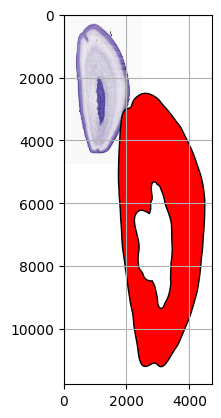

In [52]:
plt.imshow(im)
plot_shape(annot357_shapes_unscaled[strid][0],'r')

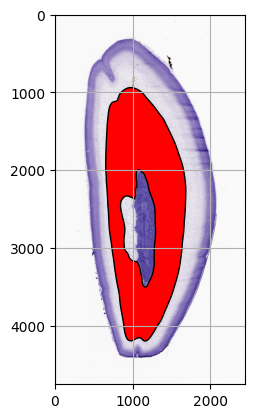

In [54]:
plt.imshow(im)
plot_shape(annot357_shapes[strid][0],'r')

In [53]:
# from IPython.display import SVG
# display(SVG(req.content))